In [1]:
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
fnames = get_image_files(path/"images")

In [4]:
dblock = DataBlock()

In [5]:
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/home/mt/.fastai/data/oxford-iiit-pet/images/Russian_Blue_173.jpg'),
 Path('/home/mt/.fastai/data/oxford-iiit-pet/images/Russian_Blue_173.jpg'))

In [4]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [16]:
dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path/"images")
dsets.train[0]

(Path('/home/mt/.fastai/data/oxford-iiit-pet/images/newfoundland_70.jpg'),
 'dog')

In [17]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path/"images")
dsets.train[0]

(PILImage mode=RGB size=500x375, TensorCategory(0))

In [18]:
dsets.vocab

['cat', 'dog']

In [5]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224))

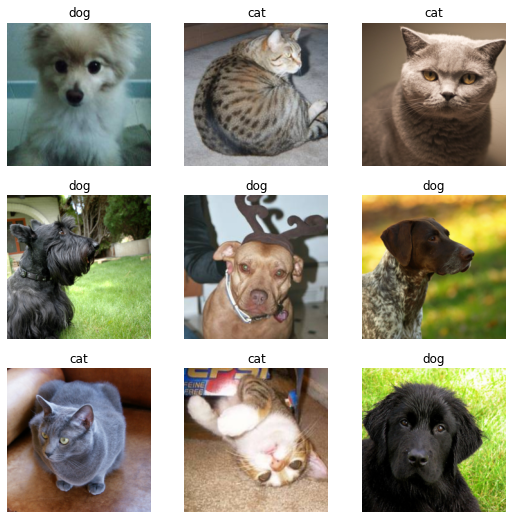

In [6]:
dls = dblock.dataloaders(path/"images")
dls.show_batch()